*******************************************************************************************************************************
# Project name: HOUSES PRICES PREDICTION
*******************************************************************************************************************************
# Student name: Vivien BOGNE TIENOUE
*******************************************************************************************************************************
### MSc CS DSA at EPITA  $ \hspace{15cm} 19^{th}$ of July 2020
*******************************************************************************************************************************
# INTRODUCTION
Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.


## The dataset 


| tagetted Value | number of Row| Number of Columns |
| --- | --- | --- |
| SalePrice | 80 | 80 |

The dataset we use have 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa. 

You will find the data [Here](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview) for more detail information.

The data is also send enclose to this notebook.

We are using only __train.csv__ to implement algorithm, create model and evaluate it.





# 1. Definition of the problem

In this project, the idea is to predict a house price sale. We will follow the methodology:
- Extract, Visualise and preprocessing the dataset
- Create some model by applying some algorithm to the dataset before optimizing the outcome
- The result of our models will be the estimate price of a house. Therefore we will use some metrics to evaluate the estimation of our prediction.



# 2. Extract the data, visualise and preprocessing

As we use Python, we will use the Pandas library to extract the data from the csv file. For the data visualization, the library seaborn is a very good one as a lot of tools for data science are already implemented. The matplotlib.pylab library is also useful to plot graphs.

## 2.1. __Let us visualise missing values using heatmap__
- To check if we need to __clean the data__ we have to read the dataset and see what values __are null, empty or not__: __THE OUTLIERS__
    

In [1]:
# Helpful packages

# Data Objects
import numpy as np    # for linear algebra
import pandas as pd   # for data 

#Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(15,10)})

#inline plotting
%matplotlib inline

import datetime
import math

In [2]:
# read the dataset

train_dataset = pd.read_csv('train.csv')

In [3]:
# visualize the info and head (view rows) of dataset
train_dataset.info()
train_dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


- Interpretation of the table's head

Many columns contain 'Nan' that means we need to clean the data.

In [4]:
# Check some statistics of our table
train_dataset.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


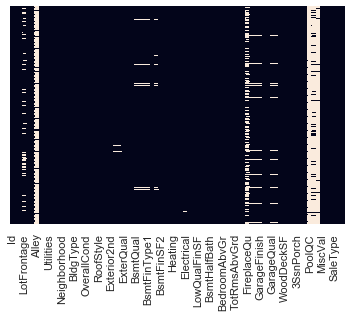

In [5]:
# visualise the table where there is missing value

sns.heatmap(train_dataset.isnull(), yticklabels = False, cbar = False)

# 2.2. Preprocessing the data

We need to have continuous features in order to apply regression models to our  dataset. For the moment they are outlier and cathegorical value where we cannot apply regression models. Lets clean our data then.


## 2.2.1. Numeric value :
We are going to use interpolation to clean numeric value otherwise it will be difficult to predict with most missing values.

- First, we are dropping column where the missing value are more that 50% : __Alley, GarageYrBlt, PoolQC, Fence, MiscFeature__


- Second,  __LotFrontage__ is also outlier. we are going to fix it by filling value with the __mean__ because it contains integers.


- Third, we also have as outliers to fill with the __mode__ since they are useful value we want to keep the efficiency of the information : __BsmtCond, BsmtQual, FireplaceQu,GarageType, GarageFinish, GarageQual, GarageCond, MasvnrType, MasVnrArea, BsmtExposure, BsmtFinType2.__


- Finally, we are going to drop ID column since it is just an index with no relationship to __SalePrice__.

In [6]:
def cleaning_numeric():
    ''' Drop or replace the missing/null value in the train_dataset'''
    train_dataset.drop(['Alley'],axis=1,inplace=True)
    train_dataset.drop(['GarageYrBlt'],axis=1,inplace=True)
    train_dataset.drop(['PoolQC','Fence','MiscFeature'],axis=1,inplace=True)
    train_dataset.drop(['Id'],axis=1,inplace=True)
    train_dataset.dropna(inplace=True)
    
    train_dataset['LotFrontage']= train_dataset['LotFrontage'].fillna(train_dataset['LotFrontage'].mean())
    
    train_dataset['BsmtCond']=train_dataset['BsmtCond'].fillna(train_dataset['BsmtCond'].mode()[0])
    train_dataset['BsmtQual']=train_dataset['BsmtQual'].fillna(train_dataset['BsmtQual'].mode()[0])
    train_dataset['FireplaceQu']=train_dataset['FireplaceQu'].fillna(train_dataset['FireplaceQu'].mode()[0])
    train_dataset['GarageType']=train_dataset['GarageType'].fillna(train_dataset['GarageType'].mode()[0])    
    train_dataset['GarageFinish']=train_dataset['GarageFinish'].fillna(train_dataset['GarageFinish'].mode()[0])
    train_dataset['GarageQual']=train_dataset['GarageQual'].fillna(train_dataset['GarageQual'].mode()[0])
    train_dataset['GarageCond']=train_dataset['GarageCond'].fillna(train_dataset['GarageCond'].mode()[0]) 
    train_dataset['MasVnrType']=train_dataset['MasVnrType'].fillna(train_dataset['MasVnrType'].mode()[0])
    train_dataset['MasVnrArea']=train_dataset['MasVnrArea'].fillna(train_dataset['MasVnrArea'].mode()[0])
    train_dataset['BsmtExposure']=train_dataset['BsmtExposure'].fillna(train_dataset['BsmtExposure'].mode()[0])   
    train_dataset['BsmtFinType2']=train_dataset['BsmtFinType2'].fillna(train_dataset['BsmtFinType2'].mode()[0])

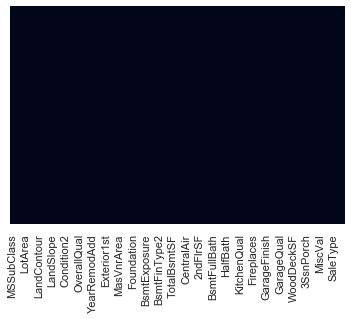

In [7]:
## Cleaning and visualising the new dataset

cleaning_numeric()
sns.heatmap(train_dataset.isnull(), yticklabels = False, cbar = False)

#### Result
- The numeric value has been clean up 

In [8]:
train_dataset.shape

(583, 75)

In [9]:
train_dataset.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
6,20,RL,75.0,10084,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,307000


### 2.2.2. Categorical features

In [10]:
columns=['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood',
         'Condition2','BldgType','Condition1','HouseStyle','SaleType',
        'SaleCondition','ExterCond',
         'ExterQual','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
        'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Heating','HeatingQC',
         'CentralAir',
         'Electrical','KitchenQual','Functional',
         'FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive']

In [11]:
def cleaning_categorical(columns):
    i=0
    for fields in columns:
        
        print(fields)
        train_dataset1=pd.get_dummies(train_dataset[fields],drop_first=True)
        
        train_dataset.drop([fields],axis=1,inplace=True)
        if i==0:
            train_dataset_final=train_dataset1.copy()
        else:
            
            train_dataset_final=pd.concat([train_dataset,train_dataset1],axis=1)
        i=i+1
       
        
    
        
    return train_dataset_final

In [12]:
## copy our train_dataset to a variable
copy_train_dataset = train_dataset.copy()

In [13]:
train_dataset = cleaning_categorical(columns)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition2
BldgType
Condition1
HouseStyle
SaleType
SaleCondition
ExterCond
ExterQual
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive


In [14]:
train_dataset.shape

(583, 38)

In [15]:
train_dataset.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,P,Y
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,0,0,5,2007,181500,0,1
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,0,0,9,2008,223500,0,1
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,272,0,0,0,0,2,2006,140000,0,1
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,0,0,12,2008,250000,0,1
6,20,75.0,10084,8,5,2004,2005,186.0,1369,0,...,0,0,0,0,0,8,2007,307000,0,1


### 2.2.3. Splitting the data to train and test

The first one is used to train/fit our model to the data, while the second will be used as a test to determine how well our model behave on new/unseen data.

Let us choose to split them into 90% for the training set and 10% for the test set.

In [16]:
def split_data(x, y, ratio, seed=1):
    """split the dataset based on the split ratio."""
    
    # set seed to have reproducible/consistent results
    np.random.seed(seed)
    
    # generate random indices
    num_row = len(y)
    indices = np.random.permutation(num_row)
    index_split = int(np.floor(ratio * num_row))
    index_train = indices[: index_split]
    index_test = indices[index_split:]
    
    # create split
    x_train = x.iloc[index_train]
    x_test = x.iloc[index_test]
    y_train = y.iloc[index_train]
    y_test = y.iloc[index_test]
    return x_train, x_test, y_train, y_test

# 3. Algorithms, models and Optimizations

In this part, we implement different machine learning models that deal with regression problems and define measures to evaluate their performance.

## 3.1. Linear Regression

The objective of Linear regression is to model a linear relationship between explanatory variables/features (independant variables) and a target (dependant variable).

- ### Hypothesis:
Y = $\theta_{0}$ + $\theta_{1} * x_{1}$ + $\theta_{2} * x_{2}$ + ... + $\theta_{n} * x_{n}$ , ie $Y = \theta^T.X $ ( T is the transpose )

    - Y is the predicted variable or target. This target is the __SalePrice__ in our dataset.

    - $\theta_{0}$ is the intercept or the bias

    - $\theta_{0} , ..., \theta_{n}$  are our model parameters from our parameter vector with intercept W

    - $x_{0}, ..., x_{n}$ are features from the vector feature X

- ### Preconditions:
    - To see if we can execute a linear regression model, we may check that a linear relationship exists between the dependent variable and the independent variables. This is one of the OLS ( Ordinary Least Squares Assumption). 
    - Then independant variables (features) must be __uncorrelated with each other__ and we should only include features which can explain the predicted variable (__features highly correlated with the target__), otherwise they are just as good as adding noise in the model.

- ### Checking:
    - To perform this, we can use scatter diagrams (utilizing the matplotlib library), seaborn (using pairplot) or heatmap again.
Let us use heatmap with correlation matrix as input.

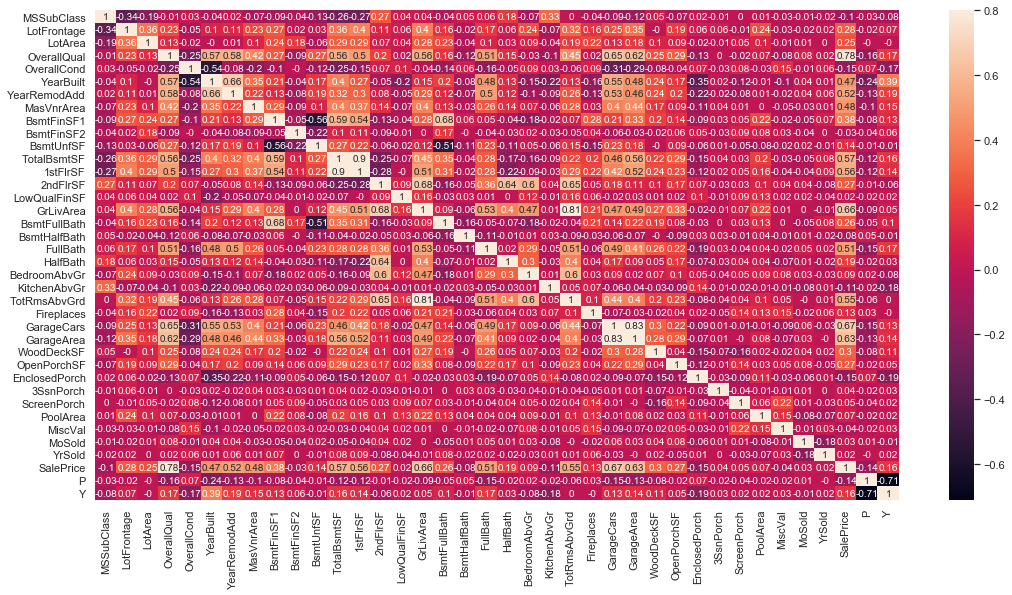

In [17]:

#correlation matrix
corr_matrix = train_dataset.corr().round(2)
f, ax = plt.subplots(figsize=(18, 9))
sns.heatmap(corr_matrix, vmax=.8, annot=True);
plt.show()

- ### Blury !!:

    - The visualization is not great because of the number of features of our tables then  __lets write a code to extract relevant features__ 

    - We are going to say (arbirtrary) that features are __highly correlated with our targer__ when the value is __greater than 60% = 0.6__

In [18]:
#Relevant features are features highly correlated with our target variable greater than 60%
relevant_features = abs(corr_matrix['SalePrice'])
relevant_features = relevant_features[relevant_features > 0.6]

relevant_features


OverallQual    0.78
GrLivArea      0.66
GarageCars     0.67
GarageArea     0.63
SalePrice      1.00
Name: SalePrice, dtype: float64

- ### Then:
__OverallQual, TotalBsmtSF, 1stFlrSF, GrLivArea, GarageCars, GarageArea__ and ofcourse __SalePrice__ itself are highly correlated.

    - #### Next : Because of Least Squares Assumptions (LSA),

        We need to take only  the independant variables  which are uncorrelated with each other


In [19]:
# the independant variables uncorrelated with each other
train_dataset[['OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'GarageCars', 'GarageArea']].corr().round(2) 

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,GarageCars,GarageArea
OverallQual,1.00,0.56,0.50,0.56,0.65,0.62
TotalBsmtSF,0.56,1.00,0.90,0.45,0.46,0.56
1stFlrSF,0.50,0.90,1.00,0.51,0.42,0.52
GrLivArea,0.56,0.45,0.51,1.00,0.47,0.49
GarageCars,0.65,0.46,0.42,0.47,1.00,0.83
GarageArea,0.62,0.56,0.52,0.49,0.83,1.00


- ### Finally:

    - TotalBsmtSF is highly correlate (> 0.6) with 1stFlrSF, 
    - GarageCars is also highly correlate (> 0.6) with GarageArea.

So we will choose only one of them in each case.

Then we will have __OverallQual, TotalBsmtSF, GrLivArea, GarageCars__ as our independant variables.

In [20]:
X = train_dataset[['OverallQual', 'TotalBsmtSF', 'GrLivArea', 'GarageCars']]
y = train_dataset.SalePrice

In [21]:
y, X

(1       181500
 2       223500
 3       140000
 4       250000
 6       307000
          ...  
 1447    240000
 1451    287090
 1455    175000
 1456    210000
 1457    266500
 Name: SalePrice, Length: 583, dtype: int64,
       OverallQual  TotalBsmtSF  GrLivArea  GarageCars
 1               6         1262       1262           2
 2               7          920       1786           2
 3               7          756       1717           3
 4               8         1145       2198           3
 6               8         1686       1694           2
 ...           ...          ...        ...         ...
 1447            8         1220       2090           2
 1451            8         1573       1578           3
 1455            6          953       1647           2
 1456            6         1542       2073           2
 1457            7         1152       2340           1
 
 [583 rows x 4 columns])

- ### Normalise X:
    - #### Why?
To make linear regression working and accurate we must normalize X ( train and test )

    - #### How ?
we normalize it by removing the mean and dividing the resulting set by the standard deviation in each dimension. This is not the only way to do it.

In [22]:
def normalize(x):
    """Normalize the original data set."""
    return (x - x.mean(axis=0))/ x.std(axis=0)


- ### Otimization WITH GRADIENT DESCENT using ROOT Mean Square Error

    - First lets prepare the train, test dataset
    
    - Second lets normalise the data and build x 
    
    - compute the mse ( Mean Square Error ) then the RMSE which is the root of the mse
    
    The loss function is define as below:
    $ \mathbf{L}(\theta_{0}, \theta_{1}, \theta_{2}, \theta_{3}, \theta_{4}, \theta_{5}) = \sqrt{2*\frac{1}{2n} \sum_{i=1}^{n} \left ( y_{n}- \theta_{0}x_{0}- \theta_{1}x_{1}- \theta_{2}x_{2}- \theta_{3}x_{3}- \theta_{4}x_{4}- \theta_{5}x_{5} \right ) ^2 } $
    
    - compute de Gradient and apply it
    


In [23]:
def dataset_model_init(X, y, r, s) :
    """Create a model to implement our algorithm"""
    
    X_train, X_test, y_train, y_test = split_data(X, y, r, seed=s)
    
    X_train = normalize(X_train)
    X_train["Intercept"] = 1 # to include the bias in the X_train matrix
    
    X_test = normalize(X_test)
    X_test["Intercept"] = 1 # to include the bias in the X_test matrix
    
    return X_train, X_test, y_train, y_test

- ## Now the computation of gradient and its update

In [24]:
def mse(e):
    """Compute the mse for the vector e."""
    return 1/2*np.mean(e**2)

def compute_gradient(y, tx, theta):
    """Compute the gradient."""
    err = y - tx.dot(theta)
    grad = -tx.T.dot(err) / len(err)
    return grad, err

def gradient_descent(y, tx, initial_theta, max_iters, gamma, epsilon = 10e-5):
    """Gradient descent algorithm."""
    # Define parameters to store theta and loss
    thetas = [initial_theta]
    losses = []
    theta = initial_theta
    prev = math.inf
    for n_iter in range(max_iters):
        # compute loss, gradient and rmse(actual loss)
        grad, err = compute_gradient(y, tx, theta) 
        loss = np.sqrt(2 * mse(err))
        # gradient theta by descent update
        theta = theta - gamma * grad
        # store theta and loss
        thetas.append(theta)
        losses.append(loss)
        #Stop earlier if we reached convergence
        if(abs(loss - prev) < epsilon) :
            print("We can Stop here because we Reached Convergence !")
            break
        prev = loss
        print("Gradient Descent({bi}/{ti}): loss={l}".format(bi=n_iter, ti=max_iters - 1, l=loss))  
    return losses, thetas

- ## Everythings has been set up we can implement the algorithm and optimize it 

In [25]:
# Define the parameters of the algorithm.
max_iters = 38
gamma = 0.7
ratio = 0.4
s = 1
# Initialization
theta_initial = np.array([0, 0, 0, 0, 0])

X_train,X_test,y_train,y_test = dataset_model_init(X,y, 0.4, 1)

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_thetas = gradient_descent(y_train, X_train, theta_initial, max_iters, gamma)
end_time = datetime.datetime.now()

#Get final thetas
params = gradient_thetas[-1]

#Model is y = theta4 + theta0* OverallQual + theta1* TotalBsmtSF +  theta2* GrLivArea + theta3*GarageCars
predictions = params[4] + params[0]*X_test.OverallQual + params[1]*X_test.TotalBsmtSF+ params[2]*X_test.GrLivArea + params[3]*X_test.GarageCars


Gradient Descent(0/37): loss=238322.2100047165
Gradient Descent(1/37): loss=102925.6553739459
Gradient Descent(2/37): loss=72144.46132399616
Gradient Descent(3/37): loss=63351.20926045139
Gradient Descent(4/37): loss=59145.76461287118
Gradient Descent(5/37): loss=56705.363101834795
Gradient Descent(6/37): loss=55252.292795072804
Gradient Descent(7/37): loss=54391.059771852146
Gradient Descent(8/37): loss=53883.79887101968
Gradient Descent(9/37): loss=53586.31155189566
Gradient Descent(10/37): loss=53412.30312969338
Gradient Descent(11/37): loss=53310.67379830624
Gradient Descent(12/37): loss=53251.366453256735
Gradient Descent(13/37): loss=53216.77147339018
Gradient Descent(14/37): loss=53196.59543877104
Gradient Descent(15/37): loss=53184.829206181385
Gradient Descent(16/37): loss=53177.967152607394
Gradient Descent(17/37): loss=53173.964869224015
Gradient Descent(18/37): loss=53171.63026911312
Gradient Descent(19/37): loss=53170.26826824457
Gradient Descent(20/37): loss=53169.4735572

- ### Predictions from our Linear Regression Model

In [26]:
predictions

336    333799.866544
273    149290.123954
224    392959.832399
503    224345.661691
540    329811.078740
           ...      
315    207151.034597
354    147740.237460
190    306398.374925
573    207315.897130
86     176513.419020
Length: 350, dtype: float64

Text(0.5, 1.0, 'Multivariable Linear Regression')

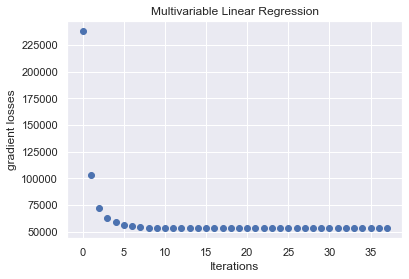

In [27]:
# See the evolution of the Gradient Descent

plt.scatter( range(max_iters), gradient_losses)
plt.xlabel('Iterations')
plt.ylabel('gradient losses')
plt.title('Multivariable Linear Regression')

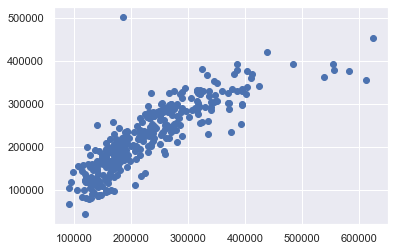

In [28]:
plt.scatter(y_test,predictions)

In the above scatter plot, we see data is in a line form, which means our model has done good predictions

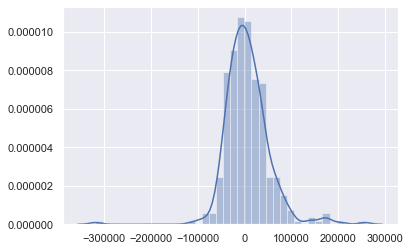

In [29]:
sns.distplot((y_test-predictions),bins=38); 


In the above histogram plot, we see data is in bell shape (Normally Distributed), which means our model has done good predictions.

In [30]:
#Evaluate performance

exection_time_np = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time_np))
train_loss_np = gradient_losses[-1]
print("Train loss (RMSE): {}".format(train_loss_np))
test_loss_np = np.sqrt(2 * mse(y_test - predictions))
print("Test loss (RMSE): {}".format(test_loss_np))


Gradient Descent: execution time=0.224 seconds
Train loss (RMSE): 53168.359215837045
Test loss (RMSE): 48068.85837894395


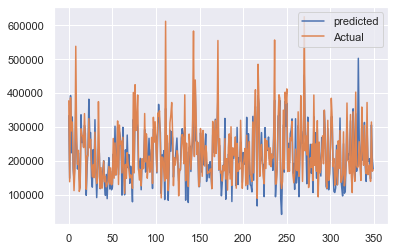

In [31]:
#Comparing model
plt.plot(range(len(predictions)),predictions);
plt.plot(range(len(y_test)),y_test);
plt.legend(['predicted','Actual'])

# We could also use sklearn to find that metric and others as follow:

In [32]:
# metrics for the test
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions)) 
print('MSE:', metrics.mean_squared_error(y_test, predictions)) 
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions))) 

MAE: 32746.574855902243
MSE: 2310615145.8549714
RMSE: 48068.858378943965


## Remark
We can see that we have almost the same RMSE when using our model.

# 3.2. Decision Tree Regressor Model, Random Forest Regressor Using sklearn

In the previous section we implement linear Regression without the use of the dedicate function already present on sklearn.
In this section we are going to use sklearn to implement those regression models.

## 3.2.1 Decision Tree Regressor Model

In [33]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV

dtr = DecisionTreeRegressor()
parameters_dtr = {"criterion" : ["mse", "friedman_mse", "mae"], "splitter" : ["best", "random"], "min_samples_split" : [2, 3, 5, 10], 
                  "max_features" : ["auto", "log2"]}
grid_dtr = GridSearchCV(dtr, parameters_dtr, verbose=1, scoring="r2")
grid_dtr.fit(X_train, y_train)

print("Best DecisionTreeRegressor Model: " + str(grid_dtr.best_estimator_))
print("Best Score: " + str(grid_dtr.best_score_))



Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best DecisionTreeRegressor Model: DecisionTreeRegressor(ccp_alpha=0.0, criterion='friedman_mse', max_depth=None,
                      max_features='log2', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=3,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')
Best Score: 0.6968620509994501


[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:    2.1s finished


In [34]:
dtr = grid_dtr.best_estimator_
dtr.fit(X_train, y_train)
dtr_pred = dtr.predict(X_test)
r2_dtr = r2_score(y_test, dtr_pred)
rmse_dtr = np.sqrt(mean_squared_error(y_test, dtr_pred))
print("R^2 Score: " + str(r2_dtr))
print("RMSE Score: " + str(rmse_dtr))

R^2 Score: 0.2655635287973761
RMSE Score: 77936.49396401901


### 3.2.2. Random Forest Regressor

In [35]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
paremeters_rf = {"n_estimators" : [5, 10, 15, 20], "criterion" : ["mse" , "mae"], "min_samples_split" : [2, 3, 5, 10], 
                 "max_features" : ["auto", "log2"]}
grid_rf = GridSearchCV(rf, paremeters_rf, verbose=1, scoring="r2")
grid_rf.fit(X_train, y_train)

print("Best RandomForestRegressor Model: " + str(grid_rf.best_estimator_))
print("Best Score: " + str(grid_rf.best_score_))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 64 candidates, totalling 320 fits
Best RandomForestRegressor Model: RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='log2', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=10, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
Best Score: 0.7435453988068729


[Parallel(n_jobs=1)]: Done 320 out of 320 | elapsed:   21.0s finished


In [36]:
rf = grid_rf.best_estimator_
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
r2_rf = r2_score(y_test, rf_pred)
rmse_rf = np.sqrt(mean_squared_error(y_test, rf_pred))
print("R^2 Score: " + str(r2_rf))
print("RMSE Score: " + str(rmse_rf))

R^2 Score: 0.7591249980414164
RMSE Score: 44633.363187330615


# 4. Conclusion

First of all lets resume all the evaluation result of our modelling:

| Models | RMSE | Time ( in seconds )|
| --- | --- | --- |
| Multi feature Linear Regression | 48068.85837894395 | 0.224 |
| Decision Tree Regression | 77936.49396401901 | 2.1s  |
| Random Forest Regression | 44633.363187330615 | 21.0s |

So to perform , deploy this model it will be benefit (Less time and error) for us to implement our Linear Regression models which has been optimise with the gradient descent